<a href="https://colab.research.google.com/github/prakash1990s/prakashgithub/blob/main/task_1student_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dataset link upload**

In [ ]:
from google.colab import files
files.upload()

Saving w-data[1] to w-data[1]


{'w-data[1]': b'Hours,Scores\r\n2.5,21\r\n5.1,47\r\n3.2,27\r\n8.5,75\r\n3.5,30\r\n1.5,20\r\n9.2,88\r\n5.5,60\r\n8.3,81\r\n2.7,25\r\n7.7,85\r\n5.9,62\r\n4.5,41\r\n3.3,42\r\n1.1,17\r\n8.9,95\r\n2.5,30\r\n1.9,24\r\n6.1,67\r\n7.4,69\r\n2.7,30\r\n4.8,54\r\n3.8,35\r\n6.9,76\r\n7.8,86'}

## **# Import liberies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:

df = pd.read_csv('http://bit.ly/w-data')

In [ ]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
df.shape

(25, 2)

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


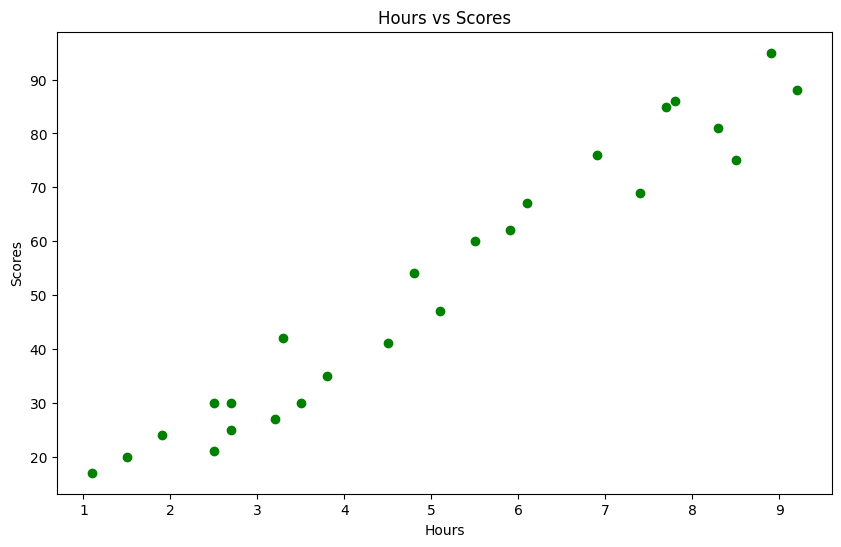

In [ ]:
#ploting the distribution scores according to hours
plt.rcParams["figure.figsize"] = [10,6]
plt.scatter(df.Hours,df.Scores, color = "green", marker = 'o')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

<Axes: xlabel='Hours', ylabel='Scores'>

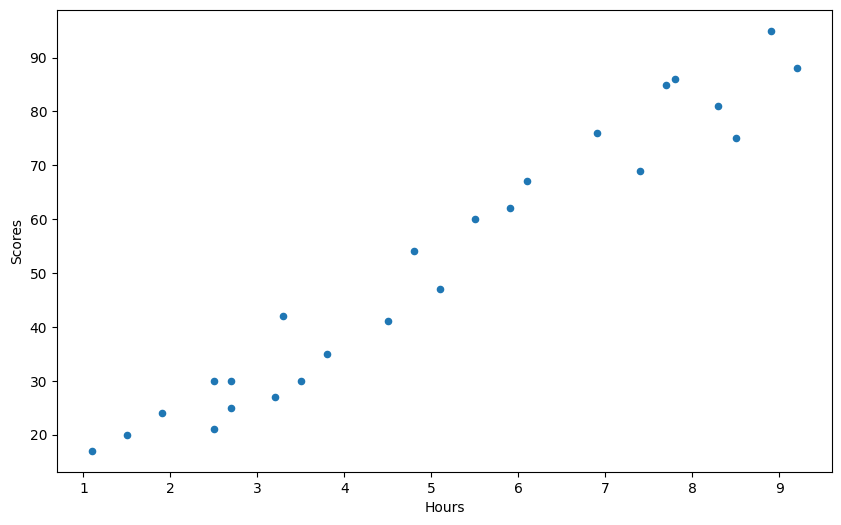

In [ ]:
df.plot(kind='scatter', x='Hours', y='Scores')

In [ ]:
df.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
df.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


## **#Linear Regression**

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


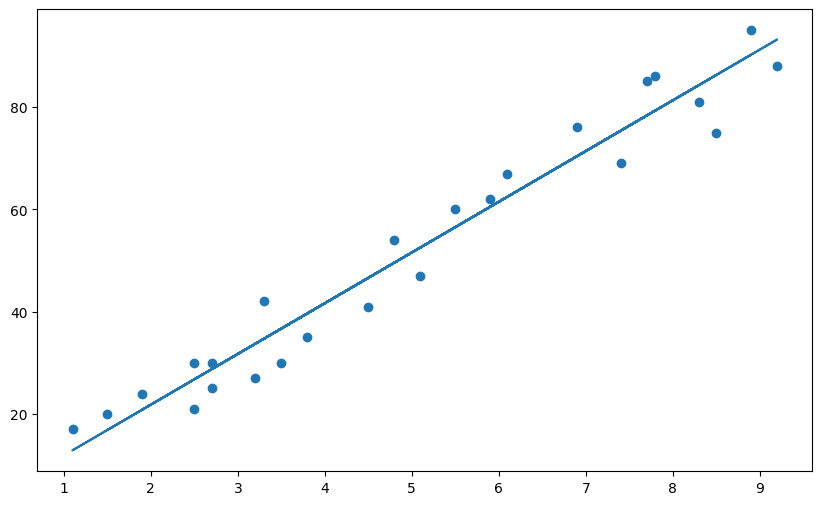

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# what would the predicted score if a student studies for 9.25 hours/day?
h=9.25
s= regressor.predict([[h]])
print("If a student studies for {} hours per day he/she will score {} % in exam.".format(h,s))

If a student studies for 9.25 hours per day he/she will score [93.69173249] % in exam.


# **Evulating the model**

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score:',r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
R2 Score: 0.9454906892105354
